## Define functions

In [9]:
import pandas as pd
import numpy as np
import time
import seaborn as sb
from network_builder import *
from BNReasoner import *
import matplotlib.pyplot as plt

In [2]:
def run_mpe(bn, n_e, naive=False):
    bn = BayesNet(structure=bn.structure.copy())
    variables = bn.get_all_variables()
    _e = np.random.choice(variables, size=n_e, replace=False)
    e = {}
    for v in _e:
        e[v] = True
    r = BNReasoner(bn)
    start = time.time()
    r.most_probable_explanation(e, naive=naive)
    return time.time() - start

## Run experiments

edges: 1 , num. of evidence: 8, avg time: 0.19443707180023193
edges: 1 , num. of evidence: 15, avg time: 0.1035037887096405
edges: 4 , num. of evidence: 8, avg time: 0.19018256044387818
edges: 4 , num. of evidence: 15, avg time: 0.101315443277359


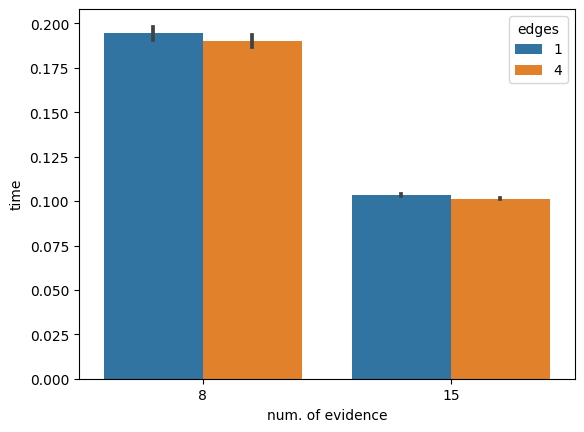

In [3]:
# mpe

df1 = pd.DataFrame()
samples = 1000
size = 4

def get_bn():
    return build_network(depth=size, width=size)

bn = get_bn()
max_n_e = len(bn.get_all_variables())

for edges in [(1, 1), (size, size)]:
    for n_e in [max_n_e // 2, max_n_e - 1]:
        times = []
        for _ in range(samples):
            bn = get_bn()
            times.append(run_mpe(bn, n_e))
        df1 = pd.concat(
            [
                df1,
                pd.DataFrame(
                    {
                        "num. of evidence": [n_e] * samples,
                        "time": times,
                        "edges": [f"{edges[0]}"] * samples,
                    }
                ),
            ]
        )
        print(f"edges: {edges[0]} , num. of evidence: {n_e}, avg time: {np.mean(times)}")

df1.to_pickle("results/df1.pkl")
sb.barplot(x="num. of evidence", y="time", data=df1, hue="edges");
plt.savefig("results/df1.pdf")

edges: 2, num. of evidence: 8, naive: False, avg time: 0.1946191382408142
edges: 2, num. of evidence: 8, naive: True, avg time: 3.585441544055939


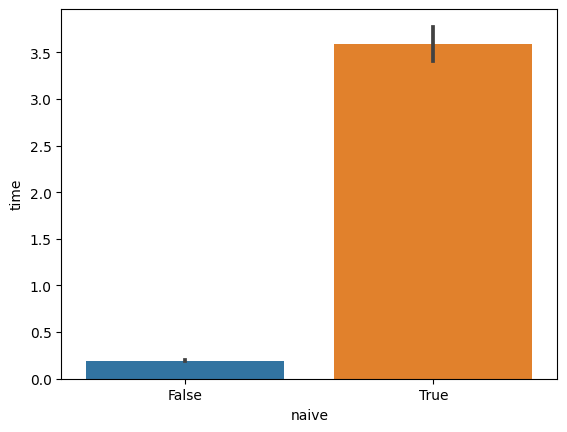

In [4]:
# mpe naive vs normal

df2 = pd.DataFrame()
samples = 100
size = 4

def get_bn():
    return build_network(depth=size, width=size)

bn = get_bn()
max_n_e = len(bn.get_all_variables())
edges = (size // 2, size // 2)

for naive in [False, True]:
    times = []
    for _ in range(samples):
        bn = get_bn()
        times.append(run_mpe(bn, max_n_e // 2, naive))
    df2 = pd.concat(
        [
            df2,
            pd.DataFrame(
                {
                    "naive": naive,
                    "time": times,
                }
            ),
        ]
    )
    print(f"edges: {edges[0]}, num. of evidence: {max_n_e // 2}, naive: {naive}, avg time: {np.mean(times)}")

df2.to_pickle("results/df2.pkl")
sb.barplot(x="naive", y="time", data=df2);
plt.savefig("results/df2.pdf")